# Modeling

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import __version__ as sklearn_version
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge



import xgboost as xgb

%matplotlib inline 

In [2]:
df = pd.read_csv('cleaned vehicles data_prep.csv')

In [3]:
df.head()

,cylinders,odometer,rating,year_difference,new_price,depreciation per year,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,mpg_Low mpg (20 - 30),mpg_Medium mpg (30 - 40),size_full-size,size_mid-size,size_sub-compact
0,6,178054.0,4.3,10,25426.696,0.098696,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,6,170259.0,4.1,7,29137.649,0.129970,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,4,86942.0,4.7,5,24223.771,0.117259,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,6,48932.0,4.1,5,29957.047,0.103149,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,6,49858.0,4.1,4,30921.106,0.044906,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [4]:
df = df.dropna()

In [5]:
# Minimum value of depreciation per year
df['depreciation per year'].min()

-0.034883758913167195


The negative value of depreciation per year reverse the context, that is the car values is appreciated or increase
in values such as Antique cars sold more than it was bought when new.

In [6]:
df.shape

(7804, 73)

In [7]:
# Assign the data into dependent or target variable as y,  and predicator variables as X
#y = df['depreciation per year']
X = df.drop('depreciation per year', axis=1)
y= df['depreciation per year']


In [8]:
# Split the data into train and test, train_size is 0.7 using train_test_plit method, 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [9]:
# Check the dimensions of training set meet the train size is 0.7
X_train.shape, X_test.shape

((5462, 72), (2342, 72))

In [10]:
X_train.columns

Index(['cylinders', 'odometer', 'rating', 'year_difference', 'new_price',
       'manufacturer_audi', 'manufacturer_bmw', 'manufacturer_buick',
       'manufacturer_cadillac', 'manufacturer_chevrolet',
       'manufacturer_chrysler', 'manufacturer_dodge', 'manufacturer_fiat',
       'manufacturer_ford', 'manufacturer_honda', 'manufacturer_hyundai',
       'manufacturer_infiniti', 'manufacturer_jaguar', 'manufacturer_kia',
       'manufacturer_lexus', 'manufacturer_lincoln', 'manufacturer_mazda',
       'manufacturer_mitsubishi', 'manufacturer_nissan', 'manufacturer_subaru',
       'manufacturer_volkswagen', 'manufacturer_volvo', 'drive_fwd',
       'drive_rwd', 'type_convertible', 'type_coupe', 'type_hatchback',
       'type_mini-van', 'type_offroad', 'type_other', 'type_pickup',
       'type_sedan', 'type_truck', 'type_van', 'type_wagon',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage', 'paint_color_b

In [11]:
X_train.head()

,cylinders,odometer,rating,year_difference,new_price,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,condition_salvage,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,mpg_Low mpg (20 - 30),mpg_Medium mpg (30 - 40),size_full-size,size_mid-size,size_sub-compact
1,6,170259.0,4.1,7,29137.649,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3709,6,67000.0,3.7,4,34870.546,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1925,4,203051.0,4.7,19,22590.436,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
5112,6,225526.0,4.1,18,23434.334,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1183,4,174010.0,4.7,14,20060.952,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


# Scaling

In [12]:
# Scale and transform the data 
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_te_scaled = scaler.transform(X_test)

# Linear Regression

In [13]:
# Apply linearRegression model and fit the X_tr_scaled.

lm = LinearRegression()
lm.fit(X_tr_scaled, y_train)

LinearRegression()

In [14]:
# Make perdictions using the model on both train and test splits.

y_tr_pred = lm.predict(X_tr_scaled)
y_te_pred = lm.predict(X_te_scaled)

In [15]:
# Assess Model Performance using sklearn r2_score attribute.

print("Linear regression training score: {:.5f}".format(r2_score(y_train, y_tr_pred)))
print("Test score: {:.5f}".format( r2_score(y_test, y_te_pred)))


Linear regression training score: 0.49006
Test score: 0.45746


Both training and test datasets return nearly the same scores implies linear regression is not 
overfit by the training dataset.

In [16]:
# Compare the result sklearn library and funtioned defined above.
training_error, test_error = mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)
print('Linear regression training dataset mean absolute error: {:.5f} '.format(training_error))
print('Linear regression test dataset mean absolute error: {:.5f}'.format(test_error))
print('\n')

Linear regression training dataset mean absolute error: 0.02352 
Linear regression test dataset mean absolute error: 0.02434




In [17]:
# mean-squared-error from scaled dataset minimize the error
mse_training, mse_test = np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))
print('Linear regression training dataset mean squaed error: {:.5f} '.format(mse_training))
print('Linear regression test dataset mean squared error: {:.5f}'.format(mse_test))
print('\n')

Linear regression training dataset mean squaed error: 0.03157 
Linear regression test dataset mean squared error: 0.03327




In [18]:
# mean sequare errror return negligble difference in training and test datasets reveal that there is no 
# indication for overfitting.

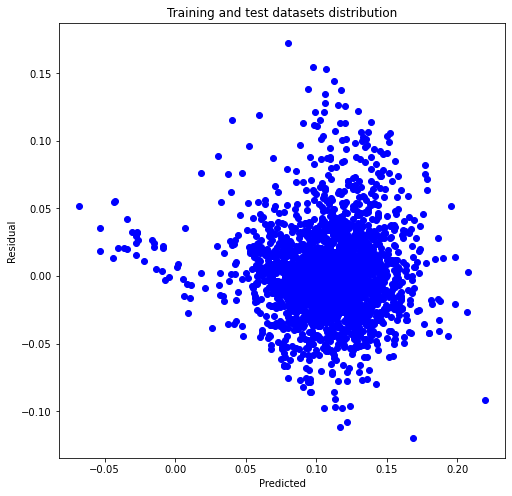

In [65]:
# Residual distribution
plt.figure(figsize=(8,8))
#plt.scatter(y_train,  y_tr_pred, color='cyan', marker="x")
plt.scatter(y_te_pred, (y_test - y_te_pred), color='b')
plt.xlabel('Predicted')
plt.ylabel("Residual")
plt.title("Training and test datasets distribution")
plt.show()

In [ ]:
# The distribution of residual versus predicted shows there is no association. Therefore errors are 
# independently to predicted values.

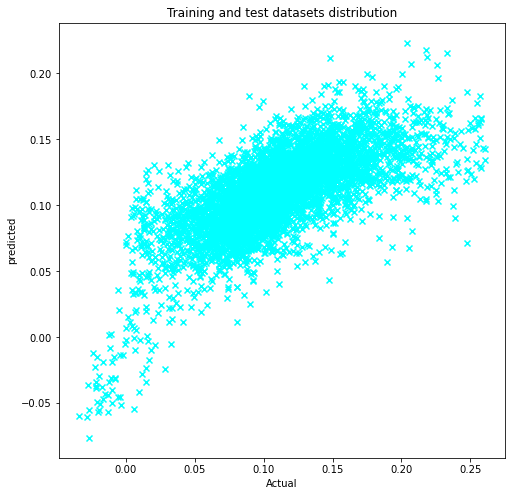

In [62]:
# Residual distribution
plt.figure(figsize=(8,8))
plt.scatter(y_train,  y_tr_pred, color='cyan', marker="x")
#plt.scatter(y_te_pred, (y_test - y_te_pred), color='lightgray')
plt.xlabel('Actual')
plt.ylabel("predicted")
plt.title("Training and test datasets distribution")
plt.show()

The distribution shows data points from training and test datasets are overlaid with minimum extreme outliers in the training dataset, however, model performance is focus on the test data points
distribution.


In [ ]:
# Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
stats.probplot(m.resid, plot=plt)
plt.title('Quantile plot')
plt.show()

# Using Pipeline

In [20]:
# Using linearRegression model to predict 'depreciation rate per year'
pipe = make_pipeline(
                    StandardScaler(),
                    #SelectKBest(), #afffect the score
                    LinearRegression())

In [21]:
# Fit the split trainig data
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**Assess performance on train and test data**

In [22]:
# Compare result R^2 using the pipe line
y_tre_pred = pipe.predict(X_train)
y_tes_pred = pipe.predict(X_test)
r2_score(y_train, y_tre_pred), r2_score(y_test, y_tes_pred)

(0.4900562573208389, 0.457458301356946)

In [23]:
# Compare the result sklearn library and funtioned defined above.
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(0.02351609808219914, 0.024336792579477233)

In [24]:
# mean-squared-error from scaled dataset minimize the error
mean_tr_error, mean_test_error = np.sqrt(mean_squared_error(y_train, y_tr_pred)), np.sqrt(mean_squared_error(y_test, y_te_pred))
print("training dataset: MSE {:.5f}".format(mean_tr_error))
print("test dataset MSE: {:.5f}".format(mean_test_error))
print('\n')

training dataset: MSE 0.03157
test dataset MSE: 0.03327




In [25]:
# Pipeline holds all the functions, parameters in a single function that makes easy to execute.

In [26]:
# Using linearRegression model to predict 'depreciation rate per year'
pipe1 = make_pipeline(
                    StandardScaler(),
                    SelectKBest(), 
                    LinearRegression()
)

In [27]:

grid_params = {'selectkbest__k':list(range(X_train.shape[1]))}
# GridSearch to the pipe line and param_grids with cross-validation 5 folds.
lr_gd_cv = GridSearchCV(pipe1, param_grid = grid_params,cv=5,n_jobs=-1)

In [28]:
%%time
# Fit train dataset to grid search output
result = lr_gd_cv.fit(X_train, y_train)

CPU times: user 2.63 s, sys: 309 ms, total: 2.93 s
Wall time: 2min 15s


/Users/temesgentesfay/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [29]:
# Assess scores
score_mean = result.cv_results_['mean_test_score']
score_std = result.cv_results_['std_test_score']
cv_k = [k for k in lr_gd_cv.cv_results_['param_selectkbest__k']]

In [30]:
# The best params attribut of lr-grid_cv
lr_gd_cv.best_params_ ,

({'selectkbest__k': 71},)

In [31]:
# The GridSearchCV score
print(" Linear regression GrideSearchCV best score: {:.5f}".format(lr_gd_cv.best_score_))

 Linear regression GrideSearchCV best score: 0.47458


In [32]:

selected = lr_gd_cv.best_estimator_.named_steps.selectkbest.get_support()

In [33]:
# Get the linear model coefficients from the `coef_` attribute and store in `coefs`,
# get the matching feature names from the column names of the dataframe,
# and display the results as a pandas Series with `coefs` as the values and `features` as the index,
# sorting the values in descending order
coefs = lr_gd_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending= False)

odometer                0.016926
condition_fair          0.006871
new_price               0.006726
type_sedan              0.006456
title_status_rebuilt    0.006455
                          ...   
cylinders              -0.005653
manufacturer_subaru    -0.005922
rating                 -0.006995
manufacturer_honda     -0.008646
year_difference        -0.016013
Length: 71, dtype: float64

The correlation coefficient sorted based on the weights. However, features correlation with the target either positive or negative. From the linear regression, very few features have a weak positive and negative association with the target variable, and the remaining features have no association or zero correlation coefficient, which 
interprated as insignificant features.

# Ridge Regularization

In [34]:
# Ridge Regularization to minimize coefficient weight to enhance model performance.
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size = 0.3, random_state=47) 
#%%time
alphas = [0.01, 0.1, 1, 10]
for alpha in alphas:
    ridge = Ridge(alpha=0.1, normalize=True) 
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
   
    print(f"Ridge regularization score: {r2_score(y_test, ridge_pred)}")
    print("Ridge {} alphas, RMSE: {}".format(alpha, np.sqrt(mean_squared_error(y_test, ridge_pred))))
    print('\n')

Ridge regularization score: 0.45548551743307775
Ridge 0.01 alphas, RMSE: 0.03332559550402752


Ridge regularization score: 0.45548551743307775
Ridge 0.1 alphas, RMSE: 0.03332559550402752


Ridge regularization score: 0.45548551743307775
Ridge 1 alphas, RMSE: 0.03332559550402752


Ridge regularization score: 0.45548551743307775
Ridge 10 alphas, RMSE: 0.03332559550402752




Ridge returns minimum loss compared to linear regression.

# XGBoost

In [58]:
# Applying or Optimizing the model with XGBoost 

dmatrix = xgb.DMatrix(data=X,label=y) 

gbm_param_grid = {'learning_rate': [0.01,0.1,0.5,0.9],
                    'n_estimators': [200],
                    'subsample': [0.3, 0.5, 0.9]} 

gbm = xgb.XGBRegressor()
grid_mse = GridSearchCV(estimator=gbm,param_grid=gbm_param_grid, scoring ='r2', cv=4, verbose=1)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_) 
print("The highest score found:  {} ".format(grid_mse.best_score_))
#print("The best loss score found: {:.5f}".format(np.sqrt(np.abs(grid_mse.best_score_))))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  3.5min finished


Best parameters found:  {'learning_rate': 0.1, 'n_estimators': 200, 'subsample': 0.9}
The highest score found:0.6212528901813843


**XGBoost regression  score the maximum than any other algorithms.**

# Decision Tree Regressor

In [36]:
# Single decision Tree and cross validated  scores using the defaul criterion (mse)
from sklearn.model_selection import cross_val_score

dt = DecisionTreeRegressor(random_state=47)
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X, y, cv=5)
print('Cross validated mean: %.5f' %(np.mean(dt_scores)))

#print('Mean score without CV:%.5f' %(dt.score(X_train, y_train)))
#print('\n')

Cross validated mean: 0.25245


In [37]:
# On the test or hold-out set 
# mean absolute error as criterion
y_pred = dt.predict(X_test)

print("R_square from single Decision Tree: {:.5f}".format(r2_score(y_test, dt.predict(X_test))))
#print("R_square from expected datasets: {:.5f} ".format( dt.score(X_test, y_test)))
#print('\n')

R_square from single Decision Tree: 0.22946


In [38]:
# The score is less from cross-validated 

In [39]:
print("Root mean squared error: {:.5f} ".format( np.sqrt(mean_squared_error(y_test, y_pred))))
#print("Mean absolute error: {:.5f}".format(mean_absolute_error(y_test, y_pred)))
#print('\n')

Root mean squared error: 0.03964 


In [40]:
# Apply GrideSearchCV on decision Tree with five-fold cross validation
param_grid = {"max_depth":range(2,20),'min_samples_split': range(2,20)}

gs = GridSearchCV(DecisionTreeRegressor(random_state=47 ),param_grid = param_grid,  cv=5)
gs.fit(X_train, y_train)

print('The best sample split: {}'.format(gs.best_params_))
print(f'GridSearch best score:  {gs.best_score_}')  
print('\n')

The best sample split: {'max_depth': 11, 'min_samples_split': 18}
GridSearch best score:  0.4135653725768126




In [41]:
# Scores from cross-validation using 'mae'criterion.
dt_ame = DecisionTreeRegressor(random_state=47, criterion='mae')
dt_ame.fit(X_train, y_train)
dt_ame_scores = cross_val_score(dt_ame, X, y, cv=5)
print("Cross validated decision trees: mean absolute error: {:.5f}". format(np.mean(dt_ame_scores)))


Cross validated decision trees: mean absolute error: 0.21712


# Random Forest Regression

In [42]:
# Define a pipleline
# UStandardScaler()
# Define randomeforestregressor as random state is 47
RF_pipe = make_pipeline(
                        StandardScaler(),
                        RandomForestRegressor(random_state=47)
                                         )

In [43]:
# Fit and assess the performance with Cross Validation
forest_cv_result = cross_validate(RF_pipe, X, y, cv=5)
forest_cv_result['score_time']

array([0.07325912, 0.10433197, 0.09029508, 0.06460619, 0.16918802])

In [44]:
# Range of cross validated scores
forest_cv_score = forest_cv_result['test_score']

In [45]:
# The mean score and standard error
np.mean(forest_cv_score), np.std(forest_cv_score)

(0.6096429801934334, 0.015091914917374159)

In [46]:
#Fit pipe line 
#%%time
RF_pipe.fit(X_train, y_train)
y_pred = RF_pipe.predict(X_test )

print("Mean absolute error:  {:.5f}: ".format( mean_absolute_error(y_test, y_pred)))
print("Root mean squared error:  {:.5f}".format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('\n')

Mean absolute error:  0.02047: 
Root mean squared error:  0.02842




In [47]:
# Create grid_params dictionary 
grid_params = {
    "randomforestregressor__max_depth":[5,10,25,30, 40,50],
    'randomforestregressor__n_estimators': [10,50,100,200],
    'standardscaler':[StandardScaler(),None]
    #'simpleimputer__strategy':['mean', 'median']
}

In [48]:
# Apply Model GridSearchCV
forest_gd_cv = GridSearchCV(RF_pipe, param_grid = grid_params, cv=5, n_jobs=-1)

In [49]:
# Fit the model
forest_gd_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 25, 30, 40,
                                                              50],
                         'randomforestregressor__n_estimators': [10, 50, 100,
                                                                 200],
                         'standardscaler': [StandardScaler(), None]})

In [50]:
#The best parameters as n_estimator equals to 200
forest_gd_cv.best_params_

{'randomforestregressor__max_depth': 30,
 'randomforestregressor__n_estimators': 200,
 'standardscaler': StandardScaler()}

In [51]:
# The accuracy score from hyperparameter tuning.
print('RandomForest best score:  {:3f}'.format(forest_gd_cv.best_score_))

RandomForest best score:  0.596646


Cross validation score a little higher than GridSearchcV but the difference is negligible, in such case
cross validation may perform in lieu of GridSearch to minimize computational cost.

In [52]:
forest_gd_cv.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, n_estimators=200,
                                       random_state=47))])

 1 year_difference 0.23768
 2 odometer   0.20663
 3 new_price  0.11016
 4 rating     0.05346
 5 drive_fwd  0.03703
 6 manufacturer_honda 0.03695
 7 type_sedan 0.03587
 8 title_status_rebuilt 0.02634
 9 cylinders  0.01975
10 condition_fair 0.01818


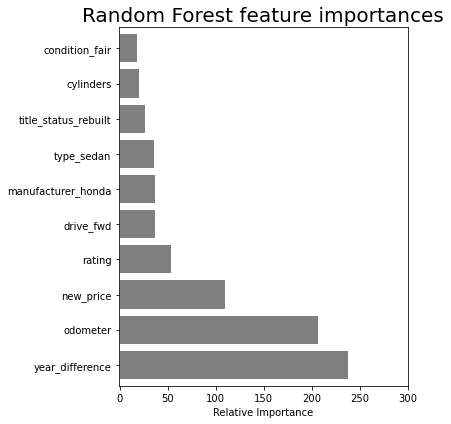

In [53]:
#Plot a barplot of the random forest's feature importances,
#assigning the feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values 
#my_color = ['#bdd7e7','#6baed6','#2171b5','#08519c']
forest = RandomForestRegressor( random_state=47)
feature_labels = df.columns.drop('depreciation per year')
forest.fit(X_train, y_train)
importances = forest.feature_importances_
#assign value in ascending order
indices = np.argsort(importances)[: : -1][:10]
for i in range(len(indices)):
    print("%2d %-*s %.5f" %(i+1, 10, feature_labels[indices[i]], importances[indices[i]]))
plt.figure(figsize=(6, 6))
plt.title('Random Forest feature importances', fontsize=20)
plt.xlabel('Relative Importance')
plt.barh(range(len(indices)), importances[indices]*1000, color='gray')
plt.yticks(range(len(indices)),feature_labels[indices], rotation=0)
plt.xlim([-1, 300])
plt.tight_layout()
plt.margins(0.02)

Conclusion: XGBoost regressor retrieved the best score, followed by Random forest with a little behind by 62.12% and 59.66% respectively. Random forest regressors yield the most relevant features to the target variable, which is a key to optimize model performance and/or solving real problems. The features year_difference, odometer are the two top dominant features followed by new_price, rating, and drive_fwd features are the top fife features attributes 64% of the score versus the remaining sixty-seven features.  
